In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
standing_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

In [3]:
data = requests.get(standing_url)

data.text

In [4]:
soup = BeautifulSoup(data.text)

In [5]:
standing_table = soup.select("table.stats_table")[0]

In [6]:
standing_table

<table class="stats_table sortable min_width force_mobilize" data-cols-to-freeze=",2" id="results2022-202391_overall"> <caption>Regular season Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team" scope="col">Squad</th> <th aria-label="Matches Played" class="poptip center" data-sta

In [7]:
links  = standing_table.find_all("a")

In [8]:
links

[<a href="/en/squads/18bb7c10/Arsenal-Stats">Arsenal</a>,
 <a href="/en/matches/92885cfc/Leeds-United-Arsenal-October-16-2022-Premier-League" style="color:#fff; text-decoration:none; background-color: transparent">W</a>,
 <a href="/en/matches/d8138438/Southampton-Arsenal-October-23-2022-Premier-League" style="color:#fff; text-decoration:none; background-color: transparent">D</a>,
 <a href="/en/matches/1b496cc1/Arsenal-Nottingham-Forest-October-30-2022-Premier-League" style="color:#fff; text-decoration:none; background-color: transparent">W</a>,
 <a href="/en/matches/af9dc838/North-West-London-Derby-Chelsea-Arsenal-November-6-2022-Premier-League" style="color:#fff; text-decoration:none; background-color: transparent">W</a>,
 <a href="/en/matches/863d7a8f/Wolverhampton-Wanderers-Arsenal-November-12-2022-Premier-League" style="color:#fff; text-decoration:none; background-color: transparent">W</a>,
 <a href="/en/players/79300479/Martin-Odegaard">Martin Ødegaard</a>,
 <a href="/en/players/4

In [9]:
links = [l.get("href") for l in links]

In [10]:
links

['/en/squads/18bb7c10/Arsenal-Stats',
 '/en/matches/92885cfc/Leeds-United-Arsenal-October-16-2022-Premier-League',
 '/en/matches/d8138438/Southampton-Arsenal-October-23-2022-Premier-League',
 '/en/matches/1b496cc1/Arsenal-Nottingham-Forest-October-30-2022-Premier-League',
 '/en/matches/af9dc838/North-West-London-Derby-Chelsea-Arsenal-November-6-2022-Premier-League',
 '/en/matches/863d7a8f/Wolverhampton-Wanderers-Arsenal-November-12-2022-Premier-League',
 '/en/players/79300479/Martin-Odegaard',
 '/en/players/466fb2c5/Aaron-Ramsdale',
 '/en/squads/b8fd03ef/Manchester-City-Stats',
 '/en/matches/2ed4b79f/Liverpool-Manchester-City-October-16-2022-Premier-League',
 '/en/matches/cd5cd3f0/Manchester-City-Brighton-and-Hove-Albion-October-22-2022-Premier-League',
 '/en/matches/96b9ae4e/Leicester-City-Manchester-City-October-29-2022-Premier-League',
 '/en/matches/6ef27b3c/Manchester-City-Fulham-November-5-2022-Premier-League',
 '/en/matches/28b60c1b/Manchester-City-Brentford-November-12-2022-Prem

In [11]:
links = [l for l in links if '/squads/' in l]


In [12]:

links

['/en/squads/18bb7c10/Arsenal-Stats',
 '/en/squads/b8fd03ef/Manchester-City-Stats',
 '/en/squads/b2b47a98/Newcastle-United-Stats',
 '/en/squads/361ca564/Tottenham-Hotspur-Stats',
 '/en/squads/19538871/Manchester-United-Stats',
 '/en/squads/822bd0ba/Liverpool-Stats',
 '/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 '/en/squads/cff3d9bb/Chelsea-Stats',
 '/en/squads/fd962109/Fulham-Stats',
 '/en/squads/cd051869/Brentford-Stats',
 '/en/squads/47c64c55/Crystal-Palace-Stats',
 '/en/squads/8602292d/Aston-Villa-Stats',
 '/en/squads/a2d435b3/Leicester-City-Stats',
 '/en/squads/4ba7cbea/Bournemouth-Stats',
 '/en/squads/5bfb9659/Leeds-United-Stats',
 '/en/squads/7c21e445/West-Ham-United-Stats',
 '/en/squads/d3fd31cc/Everton-Stats',
 '/en/squads/e4a775cb/Nottingham-Forest-Stats',
 '/en/squads/33c895d4/Southampton-Stats',
 '/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats']

In [13]:
team_urls = [f"https://fbref.com{l}" for l in links]

In [14]:
team_urls

['https://fbref.com/en/squads/18bb7c10/Arsenal-Stats',
 'https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats',
 'https://fbref.com/en/squads/b2b47a98/Newcastle-United-Stats',
 'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats',
 'https://fbref.com/en/squads/19538871/Manchester-United-Stats',
 'https://fbref.com/en/squads/822bd0ba/Liverpool-Stats',
 'https://fbref.com/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats',
 'https://fbref.com/en/squads/fd962109/Fulham-Stats',
 'https://fbref.com/en/squads/cd051869/Brentford-Stats',
 'https://fbref.com/en/squads/47c64c55/Crystal-Palace-Stats',
 'https://fbref.com/en/squads/8602292d/Aston-Villa-Stats',
 'https://fbref.com/en/squads/a2d435b3/Leicester-City-Stats',
 'https://fbref.com/en/squads/4ba7cbea/Bournemouth-Stats',
 'https://fbref.com/en/squads/5bfb9659/Leeds-United-Stats',
 'https://fbref.com/en/squads/7c21e445/West-Ham-United-Stats',
 'https://fbref.com/en/squad

In [15]:
team_url = team_urls[0]

In [16]:

data = requests.get(team_url)

In [17]:
matches = pd.read_html(data.text, match = "Scores & Fixtures")

In [18]:
matches[0].head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,44.0,25286.0,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.7,0.5,50.0,60033.0,Martin Ødegaard,4-3-3,Darren England,Match Report,NaN
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.3,0.3,57.0,10423.0,Martin Ødegaard,4-3-3,Craig Pawson,Match Report,NaN
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.6,0.8,71.0,60164.0,Martin Ødegaard,4-3-3,Jarred Gillett,Match Report,NaN
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.4,0.4,59.0,60012.0,Martin Ødegaard,4-3-3,Robert Jones,Match Report,NaN


In [19]:
matches

[          Date   Time            Comp               Round  Day Venue Result  \
 0   2022-08-05  20:00  Premier League         Matchweek 1  Fri  Away      W   
 1   2022-08-13  15:00  Premier League         Matchweek 2  Sat  Home      W   
 2   2022-08-20  17:30  Premier League         Matchweek 3  Sat  Away      W   
 3   2022-08-27  17:30  Premier League         Matchweek 4  Sat  Home      W   
 4   2022-08-31  19:30  Premier League         Matchweek 5  Wed  Home      W   
 5   2022-09-04  16:30  Premier League         Matchweek 6  Sun  Away      L   
 6   2022-09-08  18:45       Europa Lg         Group stage  Thu  Away      W   
 7   2022-09-11  14:00  Premier League         Matchweek 7  Sun  Home    NaN   
 8   2022-09-18  12:00  Premier League         Matchweek 8  Sun  Away      W   
 9   2022-10-01  12:30  Premier League         Matchweek 9  Sat  Home      W   
 10  2022-10-06  20:00       Europa Lg         Group stage  Thu  Home      W   
 11  2022-10-09  16:30  Premier League  

In [20]:
soup = BeautifulSoup(data.text)

In [21]:
links = soup.find_all("a")

In [22]:
links = [l.get("href") for l in links]

In [23]:
links = [l for l in links if l and "all_comps/shooting/" in l]

In [24]:
links

['/en/squads/18bb7c10/2022-2023/matchlogs/all_comps/shooting/Arsenal-Match-Logs-All-Competitions',
 '/en/squads/18bb7c10/2022-2023/matchlogs/all_comps/shooting/Arsenal-Match-Logs-All-Competitions',
 '/en/squads/18bb7c10/2022-2023/matchlogs/all_comps/shooting/Arsenal-Match-Logs-All-Competitions',
 '/en/squads/18bb7c10/2022-2023/matchlogs/all_comps/shooting/Arsenal-Match-Logs-All-Competitions']

In [25]:
data = requests.get(f"https://fbref.com{links[0]}")

In [26]:
shooting = pd.read_html(data.text, match = "Shooting")[0]

In [27]:
shooting.head()

For Arsenal                                                              \
         Date   Time            Comp        Round  Day Venue Result GF GA   
0  2022-08-05  20:00  Premier League  Matchweek 1  Fri  Away      W  2  0   
1  2022-08-13  15:00  Premier League  Matchweek 2  Sat  Home      W  4  2   
2  2022-08-20  17:30  Premier League  Matchweek 3  Sat  Away      W  3  0   
3  2022-08-27  17:30  Premier League  Matchweek 4  Sat  Home      W  2  1   
4  2022-08-31  19:30  Premier League  Matchweek 5  Wed  Home      W  2  1   

                   ... Standard               Expected                    \
         Opponent  ...     Dist   FK PK PKatt       xG npxG npxG/Sh G-xG   
0  Crystal Palace  ...     14.6  1.0  0     0      1.0  1.0    0.10  0.0   
1  Leicester City  ...     13.0  0.0  0     0      2.7  2.7    0.16  1.3   
2     Bournemouth  ...     14.8  0.0  0     0      1.3  1.3    0.10  1.7   
3          Fulham  ...     15.5  1.0  0     0      2.6  2.6    0.12 -0.6   
4     Aston Villa  ...     16.3  1.0  0     0      2.4  2.4    0.12 -0.4   

          Unnamed: 25_level_0  
  np:G-xG        Match Report  
0     0.0        Match Report  
1     1.3        Match Report  
2     1.7        Match Report  
3    -0.6        Match Report  
4    -0.4        Match Report  

[5 rows x 26 columns]

In [28]:
shooting.columns = shooting.columns.droplevel()

In [29]:
shooting.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2,0,Crystal Palace,...,14.6,1.0,0,0,1.0,1.0,0.10,0.0,0.0,Match Report
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4,2,Leicester City,...,13.0,0.0,0,0,2.7,2.7,0.16,1.3,1.3,Match Report
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3,0,Bournemouth,...,14.8,0.0,0,0,1.3,1.3,0.10,1.7,1.7,Match Report
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2,1,Fulham,...,15.5,1.0,0,0,2.6,2.6,0.12,-0.6,-0.6,Match Report
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2,1,Aston Villa,...,16.3,1.0,0,0,2.4,2.4,0.12,-0.4,-0.4,Match Report


In [30]:
team_data = matches[0].merge(shooting[["Date", "Sh", "SoT", "Dist","FK", "PK", "PKatt"]], on = "Date")

In [31]:
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,4-3-3,Anthony Taylor,Match Report,NaN,10,2,14.6,1.0,0,0
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,4-3-3,Darren England,Match Report,NaN,19,7,13.0,0.0,0,0
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,4-3-3,Craig Pawson,Match Report,NaN,14,6,14.8,0.0,0,0
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,4-3-3,Jarred Gillett,Match Report,NaN,22,8,15.5,1.0,0,0
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,4-3-3,Robert Jones,Match Report,NaN,22,8,16.3,1.0,0,0


In [32]:
matches[0].shape

(46, 19)

In [33]:
shooting.shape

(22, 26)

In [34]:
team_data.shape

(21, 25)

In [35]:
years = list(range(2022,2021, -1))

In [36]:
years

[2022]

In [37]:
all_matches = []

In [38]:
standing_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

In [39]:
import time
for year in years:
    data = requests.get(standing_url)
    soup = BeautifulSoup(data.text)
    standing_table = soup.select("table.stats_table")[0]
    
    links = standing_table.find_all("a")
    links = [l.get("href") for l in links]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    previous_season = soup.select("a.prev")[0].get("href")
    standing_url = f"https://fbref.com/{previous_season}"
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats","").replace("-"," ")
        
        data = requests.get(team_url)
        matches = pd.read_html(data.text, match = "Scores & Fixtures")[0]
        
        soup = BeautifulSoup(data.text)
        links = soup.find_all("a")
        links = [l.get("href") for l in links]
        links = [l for l in links if l and "all_comps/shooting/" in l]
        data = requests.get(f"https://fbref.com{links[0]}")
        shooting = pd.read_html(data.text, match = "Shooting")[0]
        shooting.columns = shooting.columns.droplevel()
        try:
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist","FK", "PK", "PKatt"]], on = "Date")
        except ValueError:
            continue
            
        team_data = team_data[team_data["Comp"] == "Premier League"]
        team_data["Season"] = year
        team_data["Team"] = team_name
        all_matches.append(team_data)
        time.sleep(1)

In [40]:
team_url.split("/")[-1].replace("-Stats","").replace("-"," ")

'Wolverhampton Wanderers'

In [41]:
match_df = pd.concat(all_matches)

In [42]:
match_df.columns = [c.lower() for c in match_df.columns]

In [43]:
match_df.to_csv("matches.csv",index = False)

In [44]:
match_df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,Match Report,NaN,10.0,2.0,14.6,1.0,0,0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,Match Report,NaN,19.0,7.0,13.0,0.0,0,0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,Match Report,NaN,14.0,6.0,14.8,0.0,0,0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,Match Report,NaN,22.0,8.0,15.5,1.0,0,0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,Match Report,NaN,22.0,8.0,16.3,1.0,0,0,2022,Arsenal


In [45]:
match_df.shape

(292, 27)

In [46]:
match_df.to_csv("matches.csv")

In [47]:
from matplotlib import pyplot as plt

In [48]:
match_df = pd.read_csv('matches.csv')

In [49]:
match_df = match_df.drop('Unnamed: 0',axis=1)


In [50]:
match_df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,Match Report,NaN,10.0,2.0,14.6,1.0,0,0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,Match Report,NaN,19.0,7.0,13.0,0.0,0,0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,Match Report,NaN,14.0,6.0,14.8,0.0,0,0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,Match Report,NaN,22.0,8.0,15.5,1.0,0,0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,Match Report,NaN,22.0,8.0,16.3,1.0,0,0,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022-10-18,20:15,Premier League,Matchweek 12,Tue,Away,L,1.0,2.0,Crystal Palace,...,Match Report,NaN,10.0,4.0,16.3,1.0,0,0,2022,Wolverhampton Wanderers
288,2022-10-23,14:00,Premier League,Matchweek 13,Sun,Home,L,0.0,4.0,Leicester City,...,Match Report,NaN,21.0,5.0,15.7,1.0,0,0,2022,Wolverhampton Wanderers
289,2022-10-29,15:00,Premier League,Matchweek 14,Sat,Away,D,1.0,1.0,Brentford,...,Match Report,NaN,13.0,4.0,20.4,0.0,0,0,2022,Wolverhampton Wanderers
290,2022-11-05,15:00,Premier League,Matchweek 15,Sat,Home,L,2.0,3.0,Brighton,...,Match Report,NaN,7.0,4.0,18.3,0.0,1,1,2022,Wolverhampton Wanderers


In [51]:
match_df['round'] = match_df['round'].apply(lambda x: x.replace('\n','').strip().replace('                           ',''))
match_df['round']

0       Matchweek 1
1       Matchweek 2
2       Matchweek 3
3       Matchweek 4
4       Matchweek 5
           ...     
287    Matchweek 12
288    Matchweek 13
289    Matchweek 14
290    Matchweek 15
291    Matchweek 16
Name: round, Length: 292, dtype: object

In [52]:
match_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
287    False
288    False
289    False
290    False
291    False
Length: 292, dtype: bool

In [53]:
##match_df.isna().sum()

In [54]:
match_df.describe()

,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,0.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0
mean,1.434932,1.434932,1.310274,1.310274,50.00000,39897.890411,NaN,12.458904,4.236301,17.050342,0.383562,0.106164,0.136986,2022.0
std,1.371987,1.371987,0.674089,0.674089,11.66809,16367.180050,NaN,5.371590,2.417501,2.851761,0.612137,0.308577,0.344423,0.0
min,0.000000,0.000000,0.100000,0.100000,25.00000,10113.000000,NaN,1.000000,0.000000,7.500000,0.000000,0.000000,0.000000,2022.0
25%,0.000000,0.000000,0.800000,0.800000,42.00000,29245.000000,NaN,8.000000,2.000000,15.175000,0.000000,0.000000,0.000000,2022.0
50%,1.000000,1.000000,1.200000,1.200000,50.00000,36641.000000,NaN,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2022.0
75%,2.000000,2.000000,1.700000,1.700000,58.00000,53286.000000,NaN,16.000000,6.000000,18.700000,1.000000,0.000000,0.000000,2022.0
max,9.000000,9.000000,3.400000,3.400000,75.00000,74147.000000,NaN,29.000000,12.000000,28.100000,3.000000,1.000000,1.000000,2022.0


In [55]:
match_df.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

In [56]:
## match_df = match_df.rename({'date':'ken', 'time':'seat'}, axis='columns')

In [57]:
##match_df.columns = ['ken', 'seat']

In [58]:
###match_df.columns = match_df.columns.str.replace(' ', '_')

In [59]:
match_df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,Match Report,NaN,10.0,2.0,14.6,1.0,0,0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,Match Report,NaN,19.0,7.0,13.0,0.0,0,0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,Match Report,NaN,14.0,6.0,14.8,0.0,0,0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,Match Report,NaN,22.0,8.0,15.5,1.0,0,0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,Match Report,NaN,22.0,8.0,16.3,1.0,0,0,2022,Arsenal


In [60]:
match_df.loc[:, ::-1].head()

,team,season,pkatt,pk,fk,dist,sot,sh,notes,match report,...,opponent,ga,gf,result,venue,day,round,comp,time,date
0,Arsenal,2022,0,0,1.0,14.6,2.0,10.0,NaN,Match Report,...,Crystal Palace,0.0,2.0,W,Away,Fri,Matchweek 1,Premier League,20:00,2022-08-05
1,Arsenal,2022,0,0,0.0,13.0,7.0,19.0,NaN,Match Report,...,Leicester City,2.0,4.0,W,Home,Sat,Matchweek 2,Premier League,15:00,2022-08-13
2,Arsenal,2022,0,0,0.0,14.8,6.0,14.0,NaN,Match Report,...,Bournemouth,0.0,3.0,W,Away,Sat,Matchweek 3,Premier League,17:30,2022-08-20
3,Arsenal,2022,0,0,1.0,15.5,8.0,22.0,NaN,Match Report,...,Fulham,1.0,2.0,W,Home,Sat,Matchweek 4,Premier League,17:30,2022-08-27
4,Arsenal,2022,0,0,1.0,16.3,8.0,22.0,NaN,Match Report,...,Aston Villa,1.0,2.0,W,Home,Wed,Matchweek 5,Premier League,19:30,2022-08-31


In [61]:
## Drop Columns where all values are missing
match_df.dropna(how='all', axis='columns')

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,Anthony Taylor,Match Report,10.0,2.0,14.6,1.0,0,0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,Darren England,Match Report,19.0,7.0,13.0,0.0,0,0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,Craig Pawson,Match Report,14.0,6.0,14.8,0.0,0,0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,Jarred Gillett,Match Report,22.0,8.0,15.5,1.0,0,0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,Robert Jones,Match Report,22.0,8.0,16.3,1.0,0,0,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022-10-18,20:15,Premier League,Matchweek 12,Tue,Away,L,1.0,2.0,Crystal Palace,...,David Coote,Match Report,10.0,4.0,16.3,1.0,0,0,2022,Wolverhampton Wanderers
288,2022-10-23,14:00,Premier League,Matchweek 13,Sun,Home,L,0.0,4.0,Leicester City,...,Michael Oliver,Match Report,21.0,5.0,15.7,1.0,0,0,2022,Wolverhampton Wanderers
289,2022-10-29,15:00,Premier League,Matchweek 14,Sat,Away,D,1.0,1.0,Brentford,...,Robert Madley,Match Report,13.0,4.0,20.4,0.0,0,0,2022,Wolverhampton Wanderers
290,2022-11-05,15:00,Premier League,Matchweek 15,Sat,Home,L,2.0,3.0,Brighton,...,Graham Scott,Match Report,7.0,4.0,18.3,0.0,1,1,2022,Wolverhampton Wanderers


In [62]:
##  Drop Columns by their names using columns parameter
match_df.drop(columns = ['day', 'date'])

,time,comp,round,venue,result,gf,ga,opponent,xg,xga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,20:00,Premier League,Matchweek 1,Away,W,2.0,0.0,Crystal Palace,1.0,1.2,...,Match Report,NaN,10.0,2.0,14.6,1.0,0,0,2022,Arsenal
1,15:00,Premier League,Matchweek 2,Home,W,4.0,2.0,Leicester City,2.7,0.5,...,Match Report,NaN,19.0,7.0,13.0,0.0,0,0,2022,Arsenal
2,17:30,Premier League,Matchweek 3,Away,W,3.0,0.0,Bournemouth,1.3,0.3,...,Match Report,NaN,14.0,6.0,14.8,0.0,0,0,2022,Arsenal
3,17:30,Premier League,Matchweek 4,Home,W,2.0,1.0,Fulham,2.6,0.8,...,Match Report,NaN,22.0,8.0,15.5,1.0,0,0,2022,Arsenal
4,19:30,Premier League,Matchweek 5,Home,W,2.0,1.0,Aston Villa,2.4,0.4,...,Match Report,NaN,22.0,8.0,16.3,1.0,0,0,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20:15,Premier League,Matchweek 12,Away,L,1.0,2.0,Crystal Palace,0.8,1.2,...,Match Report,NaN,10.0,4.0,16.3,1.0,0,0,2022,Wolverhampton Wanderers
288,14:00,Premier League,Matchweek 13,Home,L,0.0,4.0,Leicester City,2.1,0.9,...,Match Report,NaN,21.0,5.0,15.7,1.0,0,0,2022,Wolverhampton Wanderers
289,15:00,Premier League,Matchweek 14,Away,D,1.0,1.0,Brentford,0.6,1.4,...,Match Report,NaN,13.0,4.0,20.4,0.0,0,0,2022,Wolverhampton Wanderers
290,15:00,Premier League,Matchweek 15,Home,L,2.0,3.0,Brighton,1.2,1.5,...,Match Report,NaN,7.0,4.0,18.3,0.0,1,1,2022,Wolverhampton Wanderers


In [63]:
# new_df = pd.DataFrame(columns=match_df.columns)

##for match_df in pd.read_csv('matches.csv', chunksize=5):
    ##results = match_df.groupby(['Type 1']).count()
    
    ##new_df = pd.concat([new_df, results])
    
    

In [64]:
## Split column of values separated by comma into multiple columns
##match_df1 = pd.DataFrame(match_df["time"].str.split(',').fillna('[]').tolist())
##match_df1

In [65]:
## to find unique value
 ## match_df.nunique()

In [66]:
match_df.rename(columns={'date': 'ken'})


,ken,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,Match Report,NaN,10.0,2.0,14.6,1.0,0,0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,Match Report,NaN,19.0,7.0,13.0,0.0,0,0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,Match Report,NaN,14.0,6.0,14.8,0.0,0,0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,Match Report,NaN,22.0,8.0,15.5,1.0,0,0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,Match Report,NaN,22.0,8.0,16.3,1.0,0,0,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022-10-18,20:15,Premier League,Matchweek 12,Tue,Away,L,1.0,2.0,Crystal Palace,...,Match Report,NaN,10.0,4.0,16.3,1.0,0,0,2022,Wolverhampton Wanderers
288,2022-10-23,14:00,Premier League,Matchweek 13,Sun,Home,L,0.0,4.0,Leicester City,...,Match Report,NaN,21.0,5.0,15.7,1.0,0,0,2022,Wolverhampton Wanderers
289,2022-10-29,15:00,Premier League,Matchweek 14,Sat,Away,D,1.0,1.0,Brentford,...,Match Report,NaN,13.0,4.0,20.4,0.0,0,0,2022,Wolverhampton Wanderers
290,2022-11-05,15:00,Premier League,Matchweek 15,Sat,Home,L,2.0,3.0,Brighton,...,Match Report,NaN,7.0,4.0,18.3,0.0,1,1,2022,Wolverhampton Wanderers


In [67]:

match_df.rename(index={0: 'firstgame', 1: 'secondgame',2:'third game'})

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
firstgame,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,Match Report,NaN,10.0,2.0,14.6,1.0,0,0,2022,Arsenal
secondgame,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,Match Report,NaN,19.0,7.0,13.0,0.0,0,0,2022,Arsenal
third game,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,Match Report,NaN,14.0,6.0,14.8,0.0,0,0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,Match Report,NaN,22.0,8.0,15.5,1.0,0,0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,Match Report,NaN,22.0,8.0,16.3,1.0,0,0,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022-10-18,20:15,Premier League,Matchweek 12,Tue,Away,L,1.0,2.0,Crystal Palace,...,Match Report,NaN,10.0,4.0,16.3,1.0,0,0,2022,Wolverhampton Wanderers
288,2022-10-23,14:00,Premier League,Matchweek 13,Sun,Home,L,0.0,4.0,Leicester City,...,Match Report,NaN,21.0,5.0,15.7,1.0,0,0,2022,Wolverhampton Wanderers
289,2022-10-29,15:00,Premier League,Matchweek 14,Sat,Away,D,1.0,1.0,Brentford,...,Match Report,NaN,13.0,4.0,20.4,0.0,0,0,2022,Wolverhampton Wanderers
290,2022-11-05,15:00,Premier League,Matchweek 15,Sat,Home,L,2.0,3.0,Brighton,...,Match Report,NaN,7.0,4.0,18.3,0.0,1,1,2022,Wolverhampton Wanderers


In [68]:
#match_df.drop(match_df.columns[[5, 7]], axis=1, inplace=True)

In [69]:
##match_df

In [70]:
# Selecting columns and slicing

In [71]:
#match_df.date

In [72]:
#3match_df[['date']]

In [73]:

#small_df = match_df[['date', 'round']]
#print("Smaller DataFrame:")
#print(small_df.head())

In [74]:
##match_df = pd.DataFrame(match_df["day"].str.split(',').fillna('[]').tolist())
match_df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,Match Report,NaN,10.0,2.0,14.6,1.0,0,0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,Match Report,NaN,19.0,7.0,13.0,0.0,0,0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,Match Report,NaN,14.0,6.0,14.8,0.0,0,0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,Match Report,NaN,22.0,8.0,15.5,1.0,0,0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,Match Report,NaN,22.0,8.0,16.3,1.0,0,0,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022-10-18,20:15,Premier League,Matchweek 12,Tue,Away,L,1.0,2.0,Crystal Palace,...,Match Report,NaN,10.0,4.0,16.3,1.0,0,0,2022,Wolverhampton Wanderers
288,2022-10-23,14:00,Premier League,Matchweek 13,Sun,Home,L,0.0,4.0,Leicester City,...,Match Report,NaN,21.0,5.0,15.7,1.0,0,0,2022,Wolverhampton Wanderers
289,2022-10-29,15:00,Premier League,Matchweek 14,Sat,Away,D,1.0,1.0,Brentford,...,Match Report,NaN,13.0,4.0,20.4,0.0,0,0,2022,Wolverhampton Wanderers
290,2022-11-05,15:00,Premier League,Matchweek 15,Sat,Home,L,2.0,3.0,Brighton,...,Match Report,NaN,7.0,4.0,18.3,0.0,1,1,2022,Wolverhampton Wanderers


In [75]:
match_df.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [76]:
match_df.astype({'season':'float64', 'pkatt':'float'}).dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt           float64
season          float64
team             object
dtype: object

In [77]:
## match_df.isnull().sum()

In [78]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
match_df.duplicated().sum()

0

In [81]:
##match_df.isnull().sum()

In [82]:
# to remove column by user input
remove_col= input(" would u like to 'remove' any column?:")
if remove_col == "yes":
   s_col= input("Select the column you want to  remove:")
   if s_col in match_df.columns and remove_col =="yes":
      print("Column is found and removed")
      match_df = match_df.drop(columns=s_col)
else:
    print("No columns removed")


 would u like to 'remove' any column?:h
No columns removed


In [84]:
# Access a column with direct indexing
match_df["round"]



0       Matchweek 1
1       Matchweek 2
2       Matchweek 3
3       Matchweek 4
4       Matchweek 5
           ...     
287    Matchweek 12
288    Matchweek 13
289    Matchweek 14
290    Matchweek 15
291    Matchweek 16
Name: round, Length: 292, dtype: object

In [85]:
match_df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,Match Report,NaN,10.0,2.0,14.6,1.0,0,0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,Match Report,NaN,19.0,7.0,13.0,0.0,0,0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,Match Report,NaN,14.0,6.0,14.8,0.0,0,0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,Match Report,NaN,22.0,8.0,15.5,1.0,0,0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,Match Report,NaN,22.0,8.0,16.3,1.0,0,0,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022-10-18,20:15,Premier League,Matchweek 12,Tue,Away,L,1.0,2.0,Crystal Palace,...,Match Report,NaN,10.0,4.0,16.3,1.0,0,0,2022,Wolverhampton Wanderers
288,2022-10-23,14:00,Premier League,Matchweek 13,Sun,Home,L,0.0,4.0,Leicester City,...,Match Report,NaN,21.0,5.0,15.7,1.0,0,0,2022,Wolverhampton Wanderers
289,2022-10-29,15:00,Premier League,Matchweek 14,Sat,Away,D,1.0,1.0,Brentford,...,Match Report,NaN,13.0,4.0,20.4,0.0,0,0,2022,Wolverhampton Wanderers
290,2022-11-05,15:00,Premier League,Matchweek 15,Sat,Home,L,2.0,3.0,Brighton,...,Match Report,NaN,7.0,4.0,18.3,0.0,1,1,2022,Wolverhampton Wanderers


In [86]:
#import wifi_qrcode_generator as qr
#qr.wifi_qrcode('wifi name',False,'WPA','password')


In [87]:
match_df['day'].value_counts()

Sat    156
Sun     80
Wed     20
Tue     12
Mon     10
Fri      8
Thu      6
Name: day, dtype: int64

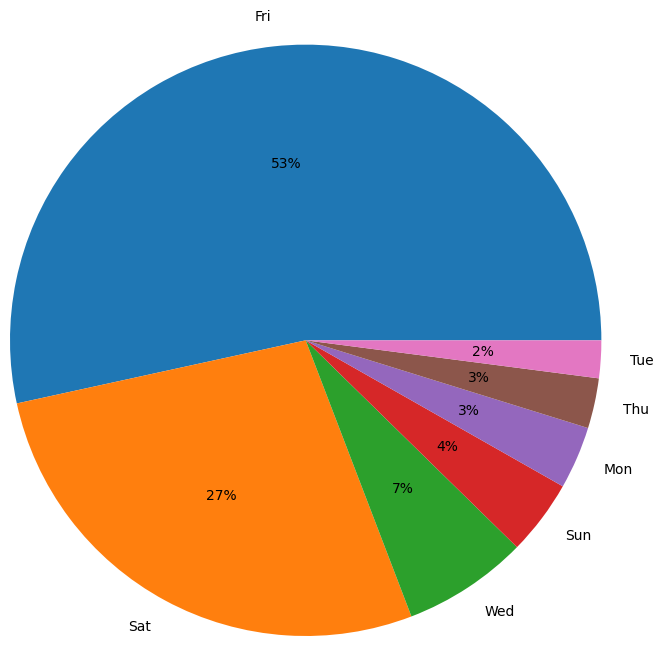

In [88]:
labels = match_df['day'].unique().tolist()
values = match_df['day'].value_counts().tolist()

plt.axis("equal")
plt.pie(values, labels=labels, radius=2, autopct='%1.0f%%')
plt.show();

In [89]:
match_df['round'].value_counts()

Matchweek 1     20
Matchweek 2     20
Matchweek 3     20
Matchweek 4     20
Matchweek 5     20
Matchweek 6     20
Matchweek 9     20
Matchweek 10    20
Matchweek 11    20
Matchweek 13    20
Matchweek 14    20
Matchweek 15    20
Matchweek 16    20
Matchweek 12    18
Matchweek 8     14
Name: round, dtype: int64

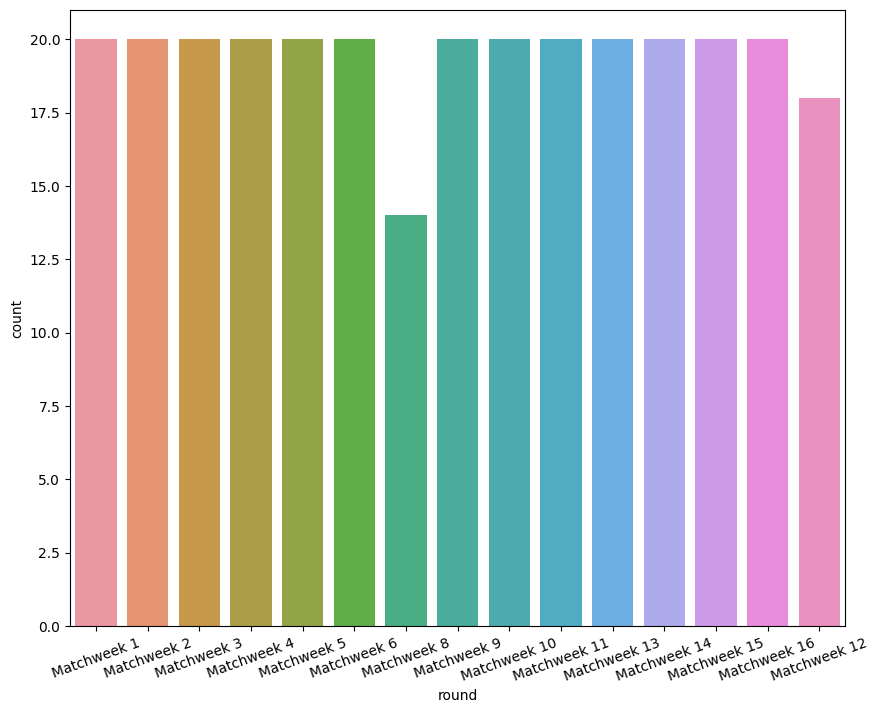

In [90]:
plt.figure(figsize=(10,8)) # set size of the figure
sns.countplot(data = match_df,x = 'round')

plt.xticks(rotation = 20);

In [91]:
match_df['result'].value_counts(dropna=False)

W    112
L    112
D     68
Name: result, dtype: int64

In [92]:
match_df1=match_df.groupby(['round'],as_index=False)['result'].sum()
match_df1=match_df1.sort_values('result',ascending=False)[:10]
match_df1

,round,result
5,Matchweek 14,WWWWWLWLDDWLLLWLDLLD
1,Matchweek 10,WWWWWLLWLLWDLWLWLDLL
0,Matchweek 1,WWWWLDWWDDLLDWWLLLLL
6,Matchweek 15,WWWLLWWLLDWWWLWLLDLL
14,Matchweek 9,WWWLLDDWLDLDWDDWWLLL
11,Matchweek 5,WWLDWWLLWDDLLDDDDLWD
10,Matchweek 4,WWDWWWWWLDLLLLLWDLLD
13,Matchweek 8,WWDWWLWLDLWLLL
8,Matchweek 2,WWDDLDDDDWDWLLDLLWDD
7,Matchweek 16,WLWWWWLLLWLWWWLLLWLL


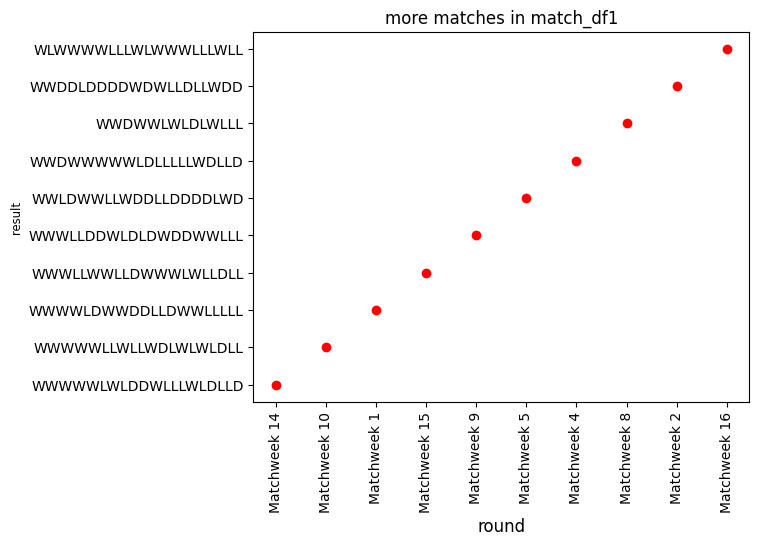

In [93]:
#plt.figure(figsize=[15,8])
plt.scatter(match_df1['round'],match_df1['result'],color='r')
plt.xlabel('round',fontsize='large')
plt.ylabel('result',fontsize='small')
plt.xticks(rotation = 90)
plt.title('more matches in match_df1')
plt.show();